# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

- `conda install quandl`
- `conda install -c conda-forge statsmodels`

In [5]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [6]:
path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating'

In [7]:
df = pd.read_csv(os.path.join(path,'Data', 'Prepared Data', 'Chocolate_cleaned.csv'))

In [8]:
df.shape

(1795, 10)

In [9]:
df.columns

Index(['Unnamed: 0', 'Company (if known)', 'Bar Origin', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

In [14]:
df = df.drop(columns =['Unnamed: 0','Company (if known)', 'Bar Origin', 'REF', 'Company Location', 'Bean Type','Bean Origin' ])

In [15]:
df.head()

Review Date  Cocoa Percent  Rating
0         2016           0.63    3.75
1         2015           0.70    2.75
2         2015           0.70    3.00
3         2015           0.70    3.50
4         2015           0.70    3.50

In [18]:
df = df.drop(columns = ['Cocoa Percent'])

In [19]:
df.head()

Review Date  Rating
0         2016    3.75
1         2015    2.75
2         2015    3.00
3         2015    3.50
4         2015    3.50

In [20]:
type(df)

pandas.core.frame.DataFrame

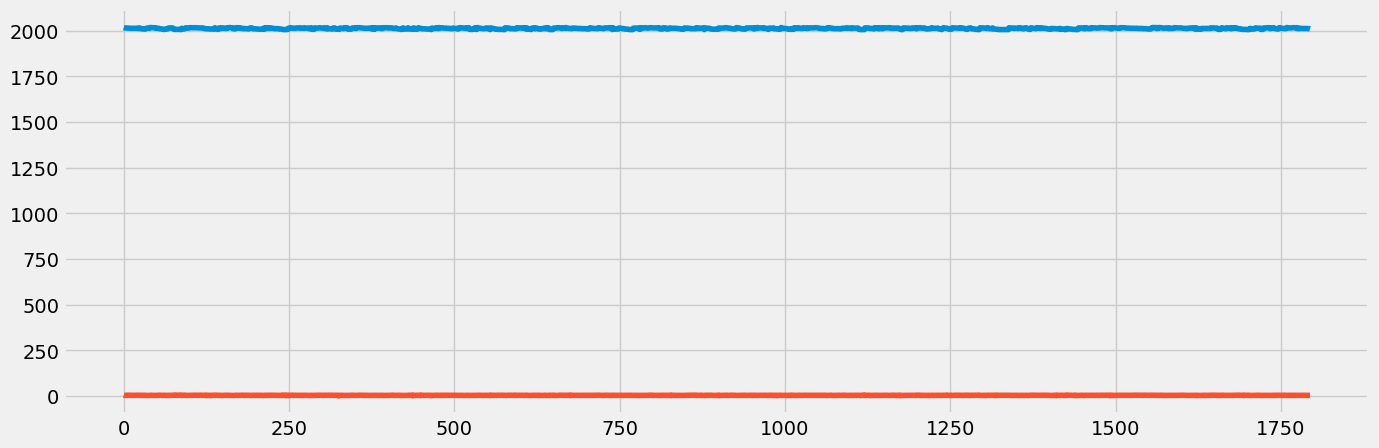

In [21]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

### 2. Subsetting, wrangling, and cleaning time-series data


In [23]:
df_sub = df.set_index('Review Date')
df_sub.head()

Rating
Review Date        
2016           3.75
2015           2.75
2015           3.00
2015           3.50
2015           3.50

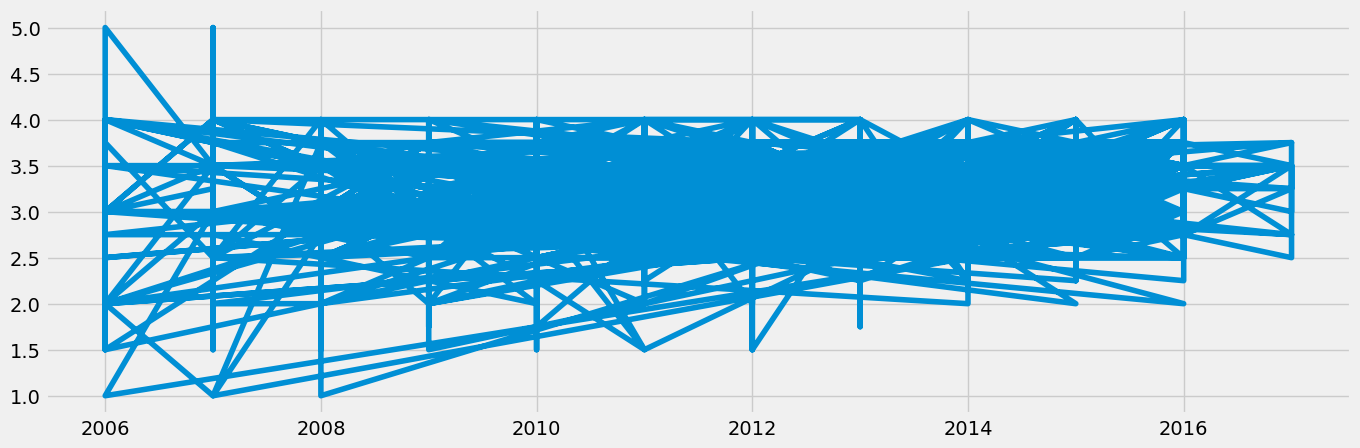

In [24]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

In [25]:
# Check for missing values (you shouldn't have any)

df_sub.isnull().sum() 

Rating    0
dtype: int64

In [26]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

1782

In [27]:
df_new = df_sub.drop_duplicates()


In [28]:
df_new


Rating
Review Date        
2016           3.75
2015           2.75
2015           3.00
2015           3.50
2014           4.00
2013           3.25
2013           2.50
2007           5.00
2010           1.75
2006           1.50
2010           2.25
2008           2.00
2007           1.00

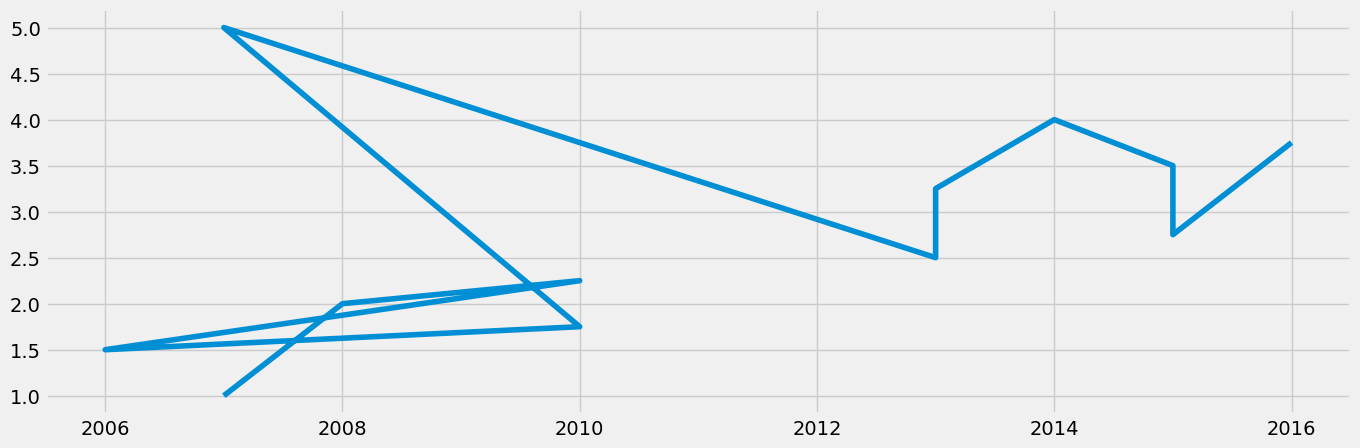

In [29]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_new)

### 3. Time-series analysis: decomposition

In [30]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_new, model='additive', period =1)

In [31]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

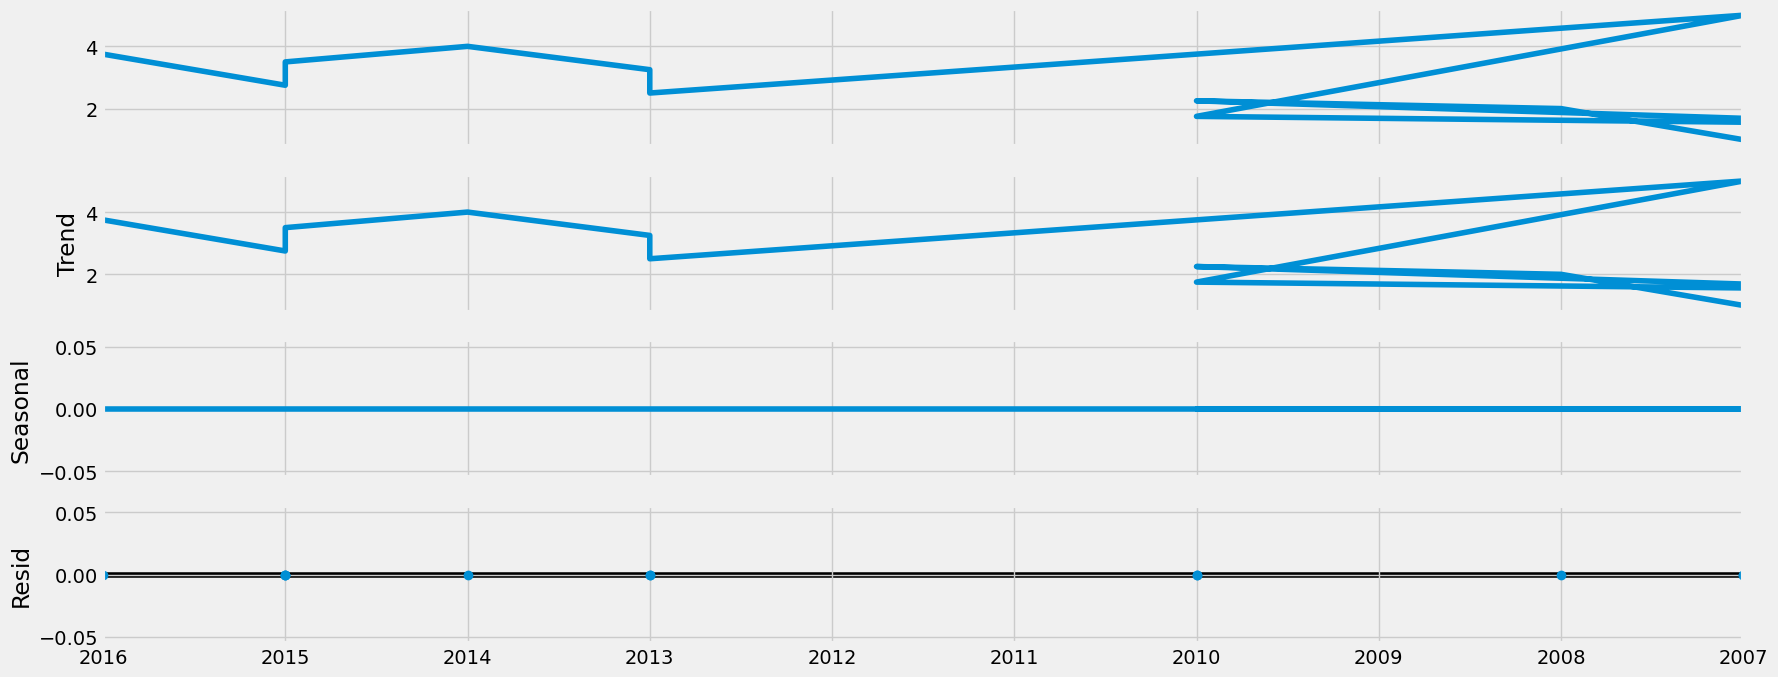

In [32]:
# Plot the separate components

decomposition.plot()
plt.show()

### 4. Testing for stationarity

In [33]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_new['Rating'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.298768
p-value                         0.172366
Number of Lags Used             0.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


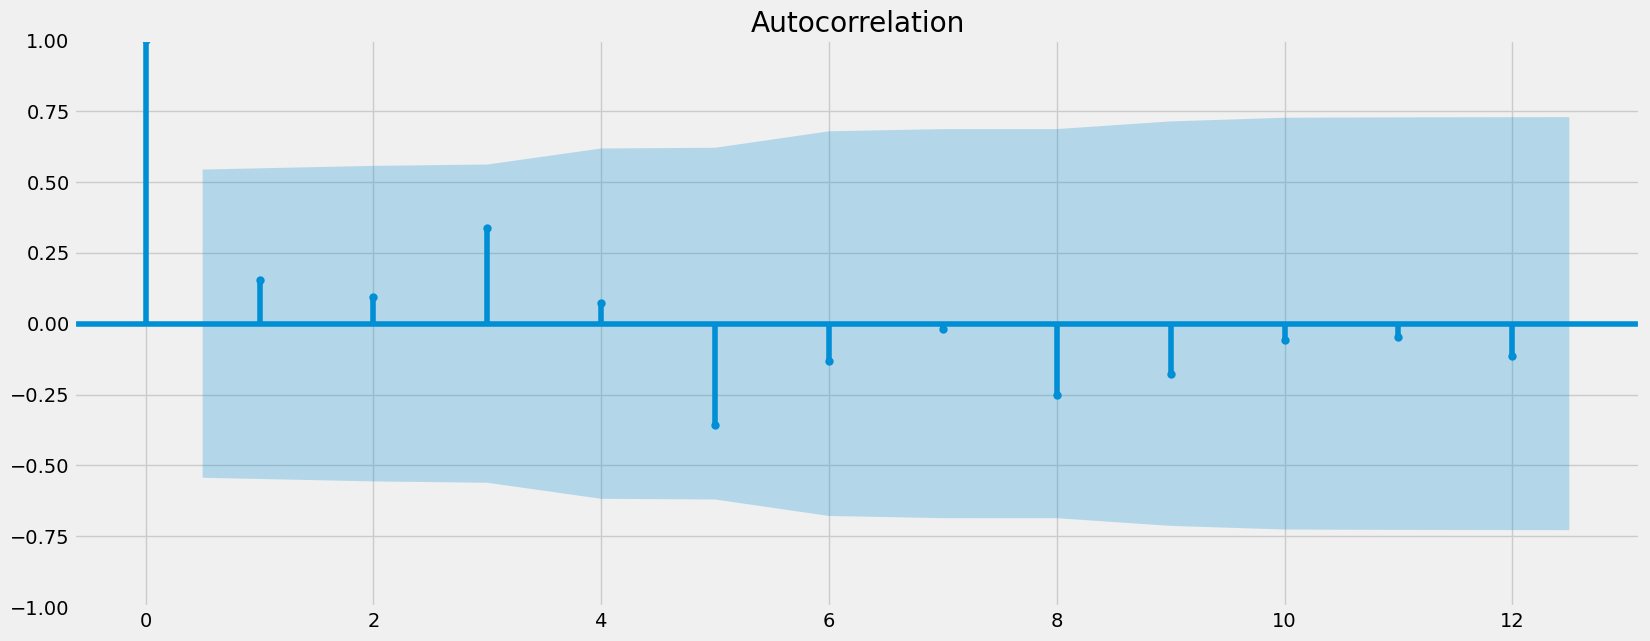

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_new)
plt.show()

In [35]:
data_diff = df_new - df_new.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [ ]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.